# 2. Reducción de la Dimensionalidad

### 2.2.1 Análisis de Componentes Principales

Matriz de Covarianza: 
                   Age  Area Income
Age          1.001001    -0.182788
Area Income -0.182788     1.001001
Valores Propios: 
 [1.18378874 0.81821326]
Vectores Propios: 
 [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
Valor 1:  1.1837887437763979 Vector 1:  [ 0.70710678 -0.70710678]
Valor 2:  0.818213258225604 Vector 2:  [0.70710678 0.70710678]


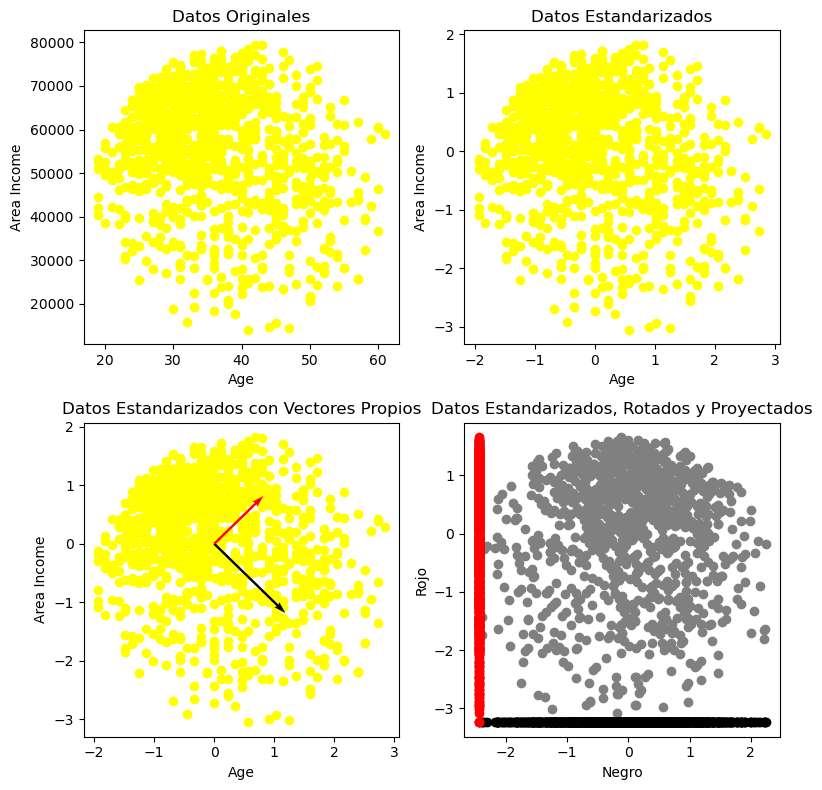

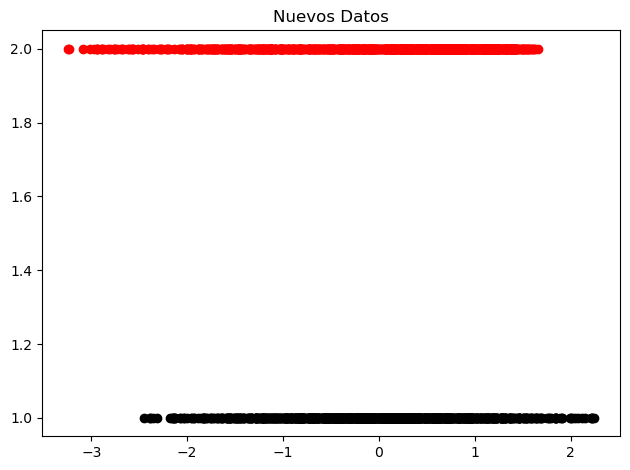

In [8]:
import pandas as pd
import matplotlib.pyplot as pl
from sklearn.preprocessing import StandardScaler
from numpy.linalg import eig
import numpy as np

# Se cargan los datos en un DataFrame
df_datos = pd.read_csv("datos/advertising.csv")

# Se estandarizan los datos originales
arr_estandarizado = StandardScaler().fit_transform(df_datos[['Age','Area Income']])
df_estandarizado = pd.DataFrame(arr_estandarizado, columns=['Age','Area Income'])

# Se calcula la matriz de covarianza
df_matriz_covarianza = df_estandarizado.cov()
print('Matriz de Covarianza: \n', df_matriz_covarianza)

# Se obtienen los (Eigen)valores (propios) y los (Eigen)vectores (propios)
arr_valores, arr_vectores = eig(df_matriz_covarianza)
print('Valores Propios: \n', arr_valores)
print('Vectores Propios: \n', arr_vectores)
arr_vector_1 = arr_vectores[:, 0]
arr_vector_2 = arr_vectores[:, 1]
valor_1 = arr_valores[0]
valor_2 = arr_valores[1]
print('Valor 1: ', valor_1, 'Vector 1: ', arr_vector_1)
print('Valor 2: ', valor_2, 'Vector 2: ', arr_vector_2)

# Se rotan los datos
arr_estandarizado_rotado = df_estandarizado.values @ arr_vectores.T
df_estandarizado_rotado = pd.DataFrame(arr_estandarizado_rotado, columns=['Negro','Rojo'])

# Se establece el tamaño de la figura
pl.figure(figsize=(8, 8)) 

# Se muestran los datos originales
pl.subplot(2, 2, 1)
pl.title(label="Datos Originales")
pl.xlabel('Age')
pl.ylabel('Area Income')
pl.scatter(df_datos['Age'], df_datos['Area Income'], color='yellow')

# Se muestran los datos estandarizados
pl.subplot(2, 2, 2)
pl.title(label="Datos Estandarizados")
pl.xlabel('Age')
pl.ylabel('Area Income')
pl.scatter(df_estandarizado['Age'], df_estandarizado['Area Income'], color='yellow')

# Se muestran los datos estandarizados con los vectores propios
pl.subplot(2, 2, 3)
pl.title(label="Datos Estandarizados con Vectores Propios")
pl.xlabel('Age')
pl.ylabel('Area Income')
pl.scatter(df_estandarizado['Age'], df_estandarizado['Area Income'], color='yellow')
pl.quiver(0, 0, arr_vector_1[0]/abs(arr_vector_1[0])*valor_1, arr_vector_1[1]/abs(arr_vector_1[1])*valor_1, scale=1, scale_units='xy', angles='xy', color='black')
pl.quiver(0, 0, arr_vector_2[0]/abs(arr_vector_2[0])*valor_2, arr_vector_2[1]/abs(arr_vector_2[1])*valor_2, scale=1, scale_units='xy', angles='xy', color='red')

# Se muestran los datos rotados y proyectados
pl.subplot(2, 2, 4)
pl.title(label="Datos Estandarizados, Rotados y Proyectados")
pl.xlabel('Negro')
pl.ylabel('Rojo')
pl.scatter(df_estandarizado_rotado['Negro'], df_estandarizado_rotado['Rojo'], color='grey')
pl.scatter(df_estandarizado_rotado['Negro'], np.full(len(df_estandarizado_rotado['Negro']), df_estandarizado_rotado['Rojo'].min()), color='black')
pl.scatter(np.full(len(df_estandarizado_rotado['Rojo']), df_estandarizado_rotado['Negro'].min()), df_estandarizado_rotado['Rojo'], color='red')

# Se visualizan los diagramas
pl.tight_layout()
pl.show()

# Se muestran los datos proyectados
# pl.subplot(1, 2, 1)
pl.title(label="Nuevos Datos")
pl.scatter(df_estandarizado_rotado['Negro'], np.full(len(df_estandarizado_rotado['Negro']), 1), color='black')
pl.scatter(df_estandarizado_rotado['Rojo'], np.full(len(df_estandarizado_rotado['Rojo']), 2), color='red')

# Se visualizan los diagramas
pl.tight_layout()
pl.show()



Matriz de Covarianza: 
 [[ 1.001001   -0.18278774]
 [-0.18278774  1.001001  ]]
Valores Propios:  [1.18378874 0.81821326]
Vectores Propios: 
 [[ 0.70710678 -0.70710678]
 [-0.70710678 -0.70710678]]
Valor 1:  1.183788743776399 Vector 1:  [ 0.70710678 -0.70710678]
Valor 2:  0.818213258225605 Vector 2:  [-0.70710678 -0.70710678]


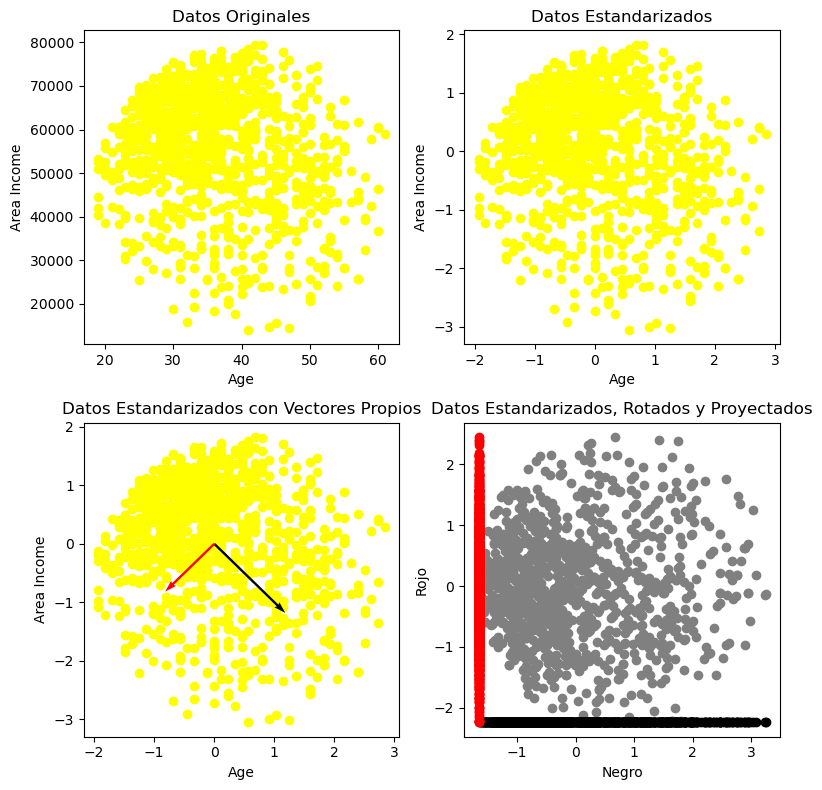

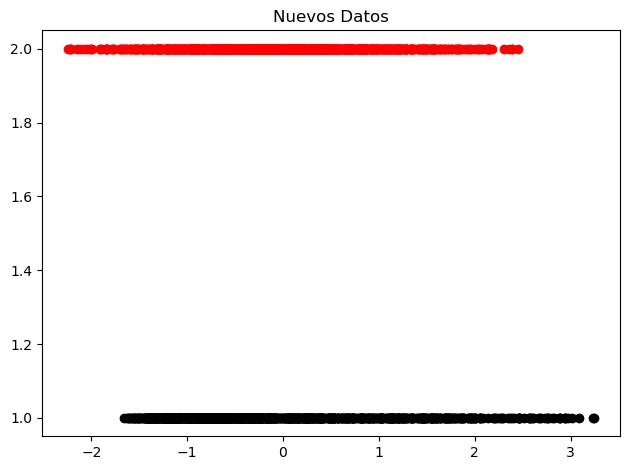

In [9]:
import pandas as pd
import matplotlib.pyplot as pl
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

# Se cargan los datos en un DataFrame
df_datos = pd.read_csv("datos/advertising.csv")

# Se estandarizan los datos originales
arr_estandarizado = StandardScaler().fit_transform(df_datos[['Age','Area Income']])
df_estandarizado = pd.DataFrame(arr_estandarizado, columns=['Age','Area Income'])

# Se obtienen los componentes principales
componentes_principales = PCA()
arr_estandarizado_rotado = componentes_principales.fit_transform(df_estandarizado)
df_estandarizado_rotado = pd.DataFrame(arr_estandarizado_rotado, columns=['Negro','Rojo'])

arr_matriz_covarianza = componentes_principales.get_covariance()
arr_valores = componentes_principales.explained_variance_
arr_vectores = componentes_principales.components_

print('Matriz de Covarianza: \n', arr_matriz_covarianza)
print('Valores Propios: ', arr_valores)
print('Vectores Propios: \n', arr_vectores)
arr_vector_1 = arr_vectores[:, 0]
arr_vector_2 = arr_vectores[:, 1]
valor_1 = arr_valores[0]
valor_2 = arr_valores[1]
print('Valor 1: ', valor_1, 'Vector 1: ', arr_vector_1)
print('Valor 2: ', valor_2, 'Vector 2: ', arr_vector_2)

# Se establece el tamaño de la figura
pl.figure(figsize=(8, 8)) 

# Se muestran los datos originales
pl.subplot(2, 2, 1)
pl.title(label="Datos Originales")
pl.xlabel('Age')
pl.ylabel('Area Income')
pl.scatter(df_datos['Age'], df_datos['Area Income'], color='yellow')

# Se muestran los datos estandarizados
pl.subplot(2, 2, 2)
pl.title(label="Datos Estandarizados")
pl.xlabel('Age')
pl.ylabel('Area Income')
pl.scatter(df_estandarizado['Age'], df_estandarizado['Area Income'], color='yellow')

# Se muestran los datos estandarizados con los vectores propios
pl.subplot(2, 2, 3)
pl.title(label="Datos Estandarizados con Vectores Propios")
pl.xlabel('Age')
pl.ylabel('Area Income')
pl.scatter(df_estandarizado['Age'], df_estandarizado['Area Income'], color='yellow')
pl.quiver(0, 0, arr_vector_1[0]/abs(arr_vector_1[0])*valor_1, arr_vector_1[1]/abs(arr_vector_1[1])*valor_1, scale=1, scale_units='xy', angles='xy', color='black')
pl.quiver(0, 0, arr_vector_2[0]/abs(arr_vector_2[0])*valor_2, arr_vector_2[1]/abs(arr_vector_2[1])*valor_2, scale=1, scale_units='xy', angles='xy', color='red')

# Se muestran los datos rotados y proyectados
pl.subplot(2, 2, 4)
pl.title(label="Datos Estandarizados, Rotados y Proyectados")
pl.xlabel('Negro')
pl.ylabel('Rojo')
pl.scatter(df_estandarizado_rotado['Negro'], df_estandarizado_rotado['Rojo'], color='grey')
pl.scatter(df_estandarizado_rotado['Negro'], np.full(len(df_estandarizado_rotado['Negro']), df_estandarizado_rotado['Rojo'].min()), color='black')
pl.scatter(np.full(len(df_estandarizado_rotado['Rojo']), df_estandarizado_rotado['Negro'].min()), df_estandarizado_rotado['Rojo'], color='red')

# Se visualizan los diagramas
pl.tight_layout()
pl.show()

# Se muestran los datos proyectados
# pl.subplot(1, 2, 1)
pl.title(label="Nuevos Datos")
pl.scatter(df_estandarizado_rotado['Negro'], np.full(len(df_estandarizado_rotado['Negro']), 1), color='black')
pl.scatter(df_estandarizado_rotado['Rojo'], np.full(len(df_estandarizado_rotado['Rojo']), 2), color='red')

# Se visualizan los diagramas
pl.tight_layout()
pl.show()


# 3. Clustering

### 3.2.2 K-Means

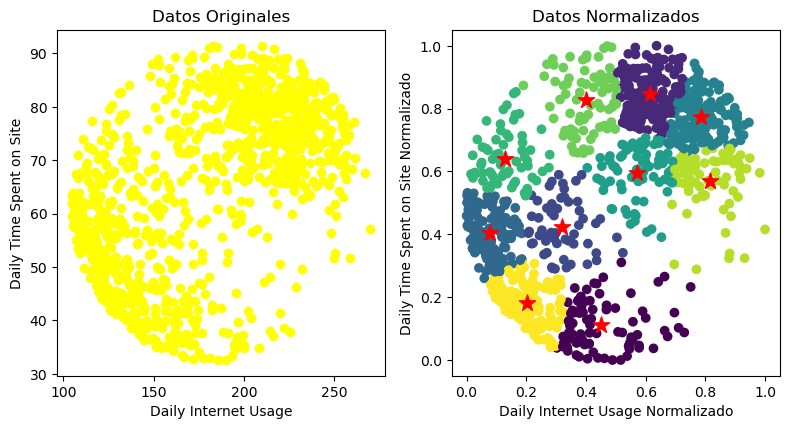

In [3]:
import pandas as pd
import matplotlib.pyplot as pl
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Se cargan los datos en un DataFrame
df_datos = pd.read_csv("datos/advertising.csv")
# print(df_datos)

# Se normalizan los datos
arr_normalizado = MinMaxScaler().fit_transform(df_datos[['Daily Internet Usage','Daily Time Spent on Site']])
df_normalizado = pd.DataFrame(arr_normalizado, columns=['Daily Internet Usage Normalizado','Daily Time Spent on Site Normalizado'])

# Se calcula el modelo
modelo_kmeans = KMeans(n_clusters=10,init='k-means++',n_init='auto').fit(df_normalizado)
df_normalizado['Cluster'] = modelo_kmeans.labels_
arr_centroides = modelo_kmeans.cluster_centers_
inercia = modelo_kmeans.inertia_

# Se establece el tamaño de la figura
pl.figure(figsize=(8, 8)) 

# Se muestran los datos originales
pl.subplot(2, 2, 1)
pl.title(label="Datos Originales")
pl.xlabel('Daily Internet Usage')
pl.ylabel('Daily Time Spent on Site')
pl.scatter(df_datos['Daily Internet Usage'], df_datos['Daily Time Spent on Site'], color='yellow')

# Se muestran los datos normalizados
pl.subplot(2, 2, 2)
pl.title(label="Datos Normalizados")
pl.xlabel('Daily Internet Usage Normalizado')
pl.ylabel('Daily Time Spent on Site Normalizado')
pl.scatter(df_normalizado['Daily Internet Usage Normalizado'], df_normalizado['Daily Time Spent on Site Normalizado'], 
           c=df_normalizado['Cluster'])
pl.scatter(arr_centroides.T[0], arr_centroides.T[1], marker='*', color='red', s=150)

# Se visualizan los diagramas
pl.tight_layout()
pl.show()



Para saber cuál es el mejor número de clusters en el que clasificar los datos se puede usar ek Método de Elbow:

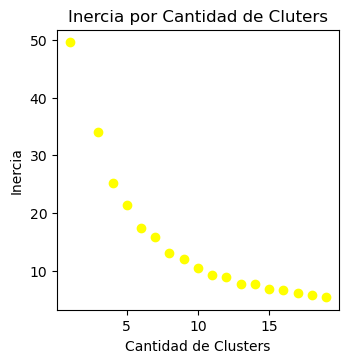

In [4]:
import pandas as pd
import matplotlib.pyplot as pl
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Se cargan los datos en un DataFrame
df_datos = pd.read_csv("datos/advertising.csv")
# print(df_datos)

# Se normalizan los datos
arr_normalizado = MinMaxScaler().fit_transform(df_datos[['Daily Internet Usage','Daily Time Spent on Site']])
df_normalizado = pd.DataFrame(arr_normalizado, columns=['Daily Internet Usage Normalizado','Daily Time Spent on Site Normalizado'])

# Se calcula la incercia para cada valor de n_clusters
modelo_kmeans = KMeans(n_clusters=2,init='k-means++',n_init='auto').fit(df_normalizado)
inercia = modelo_kmeans.inertia_
arr_inercias_por_n_cluster = np.array([[1, inercia]])
for x in range(3,20):
    modelo_kmeans = KMeans(n_clusters=x,init='k-means++',n_init='auto').fit(df_normalizado)
    inercia = modelo_kmeans.inertia_
    arr_inercias_por_n_cluster = np.vstack((arr_inercias_por_n_cluster, np.array([x, inercia])))

    # Se establece el tamaño de la figura
pl.figure(figsize=(8, 8)) 

# Se muestran los datos originales
pl.subplot(2, 2, 1)
pl.title(label="Inercia por Cantidad de Cluters")
pl.xlabel('Cantidad de Clusters')
pl.ylabel('Inercia')
pl.scatter(arr_inercias_por_n_cluster.T[0], arr_inercias_por_n_cluster.T[1], color='yellow')



### 3.2.3 Agrupamiento Jerárquico

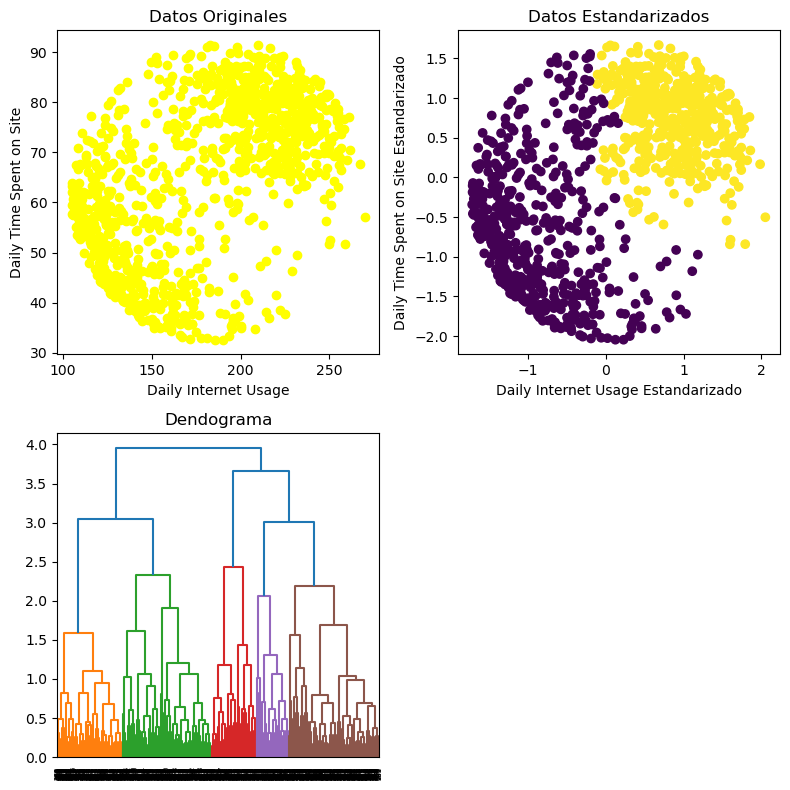

Matriz de Distancias:
[[0.         1.58864431 0.44764545 ... 3.42944668 2.03137931 2.53402247]
 [1.58864431 0.         1.18716571 ... 2.65625957 1.85565771 2.4624838 ]
 [0.44764545 1.18716571 0.         ... 3.04492825 1.7308589  2.26692649]
 ...
 [3.42944668 2.65625957 3.04492825 ... 0.         1.55983825 1.38579381]
 [2.03137931 1.85565771 1.7308589  ... 1.55983825 0.         0.70021999]
 [2.53402247 2.4624838  2.26692649 ... 1.38579381 0.70021999 0.        ]]
Matriz de Distancias Condensada:
[1.58864431 0.44764545 0.4021509  ... 1.55983825 1.38579381 0.70021999]
Dendograma:
[[2.02000000e+02 9.56000000e+02 6.70973313e-04 2.00000000e+00]
 [3.13000000e+02 8.73000000e+02 6.83676809e-04 2.00000000e+00]
 [6.10000000e+01 2.42000000e+02 1.82313816e-03 2.00000000e+00]
 ...
 [1.98700000e+03 1.99300000e+03 3.04888379e+00 4.79000000e+02]
 [1.99400000e+03 1.99500000e+03 3.65896411e+00 5.21000000e+02]
 [1.99600000e+03 1.99700000e+03 3.94837309e+00 1.00000000e+03]]


In [6]:
import pandas as pd
import matplotlib.pyplot as pl
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import confusion_matrix 
from sklearn import metrics 
from scipy.spatial import distance_matrix 
from scipy.cluster import hierarchy 
from sklearn.cluster import AgglomerativeClustering 
from scipy.spatial.distance import squareform

# Se cargan los datos en un DataFrame
df_datos = pd.read_csv("datos/advertising.csv")

# Se estandarizan los datos originales
arr_estandarizado = StandardScaler().fit_transform(df_datos[['Daily Internet Usage','Daily Time Spent on Site']])
df_estandarizado = pd.DataFrame(arr_estandarizado, columns=['Daily Internet Usage Estandarizado','Daily Time Spent on Site Estandarizado'])

# SDe calcula el modelo
modelo_aglomerativo=AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='complete').fit(df_estandarizado) 
df_estandarizado['Cluster'] = modelo_aglomerativo.labels_

# Se establece el tamaño de la figura
pl.figure(figsize=(8, 8)) 

# Se muestran los datos originales
pl.subplot(2, 2, 1)
pl.title(label="Datos Originales")
pl.xlabel('Daily Internet Usage')
pl.ylabel('Daily Time Spent on Site')
pl.scatter(df_datos['Daily Internet Usage'], df_datos['Daily Time Spent on Site'], color='yellow')

# Se muestran los datos normalizados
pl.subplot(2, 2, 2)
pl.title(label="Datos Estandarizados")
pl.xlabel('Daily Internet Usage Estandarizado')
pl.ylabel('Daily Time Spent on Site Estandarizado')
pl.scatter(df_estandarizado['Daily Internet Usage Estandarizado'], df_estandarizado['Daily Time Spent on Site Estandarizado'], 
           c=df_estandarizado['Cluster'])

pl.subplot(2, 2, 3)
pl.title(label="Dendograma")
arr_matriz_distancias = distance_matrix(df_estandarizado, df_estandarizado)
arr_matriz_distancias_condensada = squareform(arr_matriz_distancias)
arr_dendograma = hierarchy.linkage(arr_matriz_distancias_condensada,'complete') 
dendrograma = hierarchy.dendrogram(arr_dendograma) 

# Se visualizan los diagramas
pl.tight_layout()
pl.show()

print("Matriz de Distancias:")
print(arr_matriz_distancias)
print("Matriz de Distancias Condensada:")
print(arr_matriz_distancias_condensada)
print("Dendograma:")
print(arr_dendograma)


### 3.2.4 Agrupamiento Espacial basado en Densidad (DBSCAN)

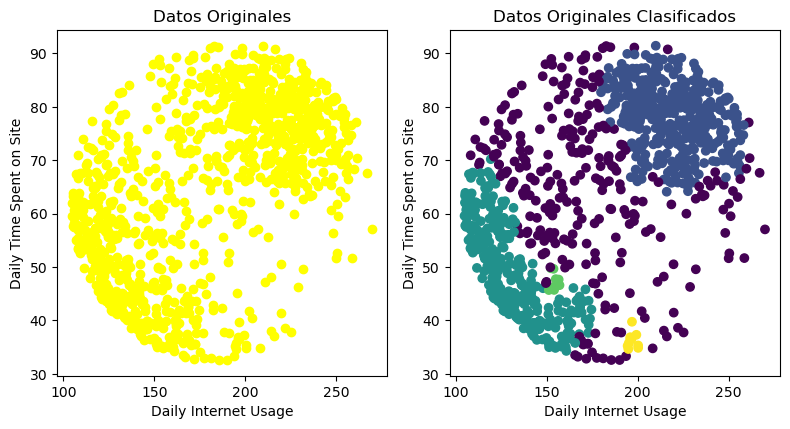

In [6]:
import pandas as pd
import matplotlib.pyplot as pl
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN

# Se cargan los datos en un DataFrame
df_datos = pd.read_csv("datos/advertising.csv")

# Se calcula el modelo
modelo_dbscan = DBSCAN(eps=4,min_samples=10).fit(df_datos[['Daily Internet Usage','Daily Time Spent on Site']])
df_datos['Cluster'] = modelo_dbscan.labels_

# Se establece el tamaño de la figura
pl.figure(figsize=(8, 8)) 

# Se muestran los datos originales
pl.subplot(2, 2, 1)
pl.title(label="Datos Originales")
pl.xlabel('Daily Internet Usage')
pl.ylabel('Daily Time Spent on Site')
pl.scatter(df_datos['Daily Internet Usage'], df_datos['Daily Time Spent on Site'], color='yellow')

# Se muestran los datos normalizados
pl.subplot(2, 2, 2)
pl.title(label="Datos Originales Clasificados")
pl.xlabel('Daily Internet Usage')
pl.ylabel('Daily Time Spent on Site')
pl.scatter(df_datos['Daily Internet Usage'], df_datos['Daily Time Spent on Site'], 
           c=df_datos['Cluster'])

# Se visualizan los diagramas
pl.tight_layout()
pl.show()


# 4. Detección de Anomalías

## 4.2 Distancia de Mahanalobis

[[6.88509286e+01 1.55423102e+06]]
     Unnamed: 0  Store        Date  Weekly_Sales  Holiday_Flag  Temperature  \
0             1    1.0         NaN    1641957.44           1.0        38.51   
1             3    1.0  26-02-2010    1409727.59           NaN        46.63   
2             5    1.0  12-03-2010    1439541.59           0.0        57.79   
3             6    1.0  19-03-2010    1472515.79           0.0        54.58   
4             7    1.0  26-03-2010    1404429.92           0.0        51.45   
..          ...    ...         ...           ...           ...          ...   
135         138    1.0  28-09-2012    1437059.26           0.0        76.08   
136         139    1.0  05-10-2012    1670785.97           0.0        68.55   
137         140    1.0  12-10-2012    1573072.81           0.0        62.99   
138         141    1.0  19-10-2012    1508068.77           0.0        67.97   
139         142    1.0  26-10-2012    1493659.74           0.0        69.16   

     Fuel_Price  

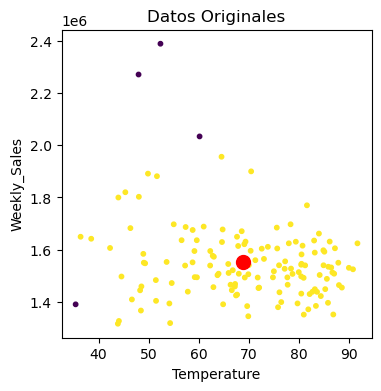

In [1]:
import pandas as pd
import matplotlib.pyplot as pl
import numpy as np
from scipy.spatial import distance

# Se cargan los datos
df_datos = pd.read_csv("datos/walmart.csv")

# Se tratan los valores ausentes
df_datos = df_datos.dropna(subset=['Temperature','Weekly_Sales'])
df_datos = df_datos.reset_index(drop=True)

# Si hay varias dimensiones (variables independientes) conviene estandarizar los datos
"""
from sklearn.preprocessing import StandardScaler
arr_estandarizado = StandardScaler().fit_transform(df_datos[['x','y']])
df_datos = pd.DataFrame(arr_estandarizado,
                                columns=['x','y'])
"""

# Se calcula el punto medio (centroide)
arr_centroide = np.array([np.mean(df_datos[['Temperature','Weekly_Sales']], axis=0)])
print(arr_centroide)

# Se calcula distancia de de mahalanobis de cada punto al punto medio
arr_distancia_mahalanobis = distance.cdist(df_datos[['Temperature','Weekly_Sales']], arr_centroide, 'mahalanobis')
df_distancia_mahalanobis = pd.DataFrame(arr_distancia_mahalanobis, columns=['Mahalanobis'])
df_datos = df_datos.join(df_distancia_mahalanobis)

# Se determina que los puntos cuya distancia de mahalanobis sea superior a 2.7 son anomalías
df_anomalia = df_datos[['Mahalanobis']] < 2.7
df_anomalia = df_anomalia.rename(columns={ 'Mahalanobis': 'Anomalia' })
df_anomalia = df_anomalia.replace({True: 1, False: -1})

# Se añade la columna indicadora de anomalía en el dataframe
df_datos = df_datos.join(df_anomalia)
print(df_datos)

# Se establece el tamaño de la figura
pl.figure(figsize=(4, 4)) 

# Se muestran el centroide, los datos normales y las anomalías
pl.title(label="Datos Originales")
pl.xlabel('Temperature')
pl.ylabel('Weekly_Sales')
pl.scatter(df_datos['Temperature'], df_datos['Weekly_Sales'], c=df_datos['Anomalia'], s=10)
pl.scatter(arr_centroide[0][0], arr_centroide[0][1], s=100, color='red')



## 4.3 Bosques de Aislamiento

     Unnamed: 0  Store        Date  Weekly_Sales  Holiday_Flag  Temperature  \
0             1    1.0         NaN    1641957.44           1.0        38.51   
1             3    1.0  26-02-2010    1409727.59           NaN        46.63   
2             5    1.0  12-03-2010    1439541.59           0.0        57.79   
3             6    1.0  19-03-2010    1472515.79           0.0        54.58   
4             7    1.0  26-03-2010    1404429.92           0.0        51.45   
..          ...    ...         ...           ...           ...          ...   
135         138    1.0  28-09-2012    1437059.26           0.0        76.08   
136         139    1.0  05-10-2012    1670785.97           0.0        68.55   
137         140    1.0  12-10-2012    1573072.81           0.0        62.99   
138         141    1.0  19-10-2012    1508068.77           0.0        67.97   
139         142    1.0  26-10-2012    1493659.74           0.0        69.16   

     Fuel_Price         CPI  Unemployment Weekly_Ra

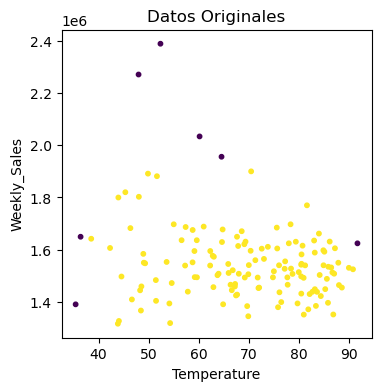

In [2]:
import pandas as pd
import matplotlib.pyplot as pl
import numpy as np
from sklearn.ensemble import IsolationForest

# Se cargan los datos
df_datos = pd.read_csv("datos/walmart.csv")

# Se tratan los valores ausentes
df_datos = df_datos.dropna(subset=['Temperature','Weekly_Sales'])
df_datos = df_datos.reset_index(drop=True)

# Se crea el modelo
bosque_aislamiento = IsolationForest(contamination=0.05)
modelo_bosque_aislamiento = bosque_aislamiento.fit(df_datos[['Temperature','Weekly_Sales']].values)

# Con dicho modelo se predicen cuáles de los mismos datos que se han utilizado para crear el propio modelo son anomalías
arr_anomalia = modelo_bosque_aislamiento.predict(df_datos[['Temperature','Weekly_Sales']].values)
df_anomalia = pd.DataFrame(arr_anomalia,columns=['Anomalia'])

# Se añade la columna indicadora de anomalía en el dataframe
df_datos = df_datos.join(df_anomalia)
print(df_datos)

# Se establece el tamaño de la figura
pl.figure(figsize=(4, 4)) 

# Se muestran los datos normales y las anomalías
pl.title(label="Datos Originales")
pl.xlabel('Temperature')
pl.ylabel('Weekly_Sales')
pl.scatter(df_datos['Temperature'], df_datos['Weekly_Sales'], c=df_datos['Anomalia'], s=10)

